## Курсовой проект
## Условия
Выбрать тему для курсового проекта. Курсовой по желанию. Данные с kaggle.com
Варианты тем:

1. EDA (рассчитать описательные статистики + графический анализ с выводами)
2. Тестирование гипотезы (условия применимости того или иного критерия проверить , можно с графиками+ провести тестирование, оформить вывод)
3. Линейная регрессия (условия применимости метода проверить ,можно с графиками, построить модель, исследовать на статистическую значимость модель ,можно и коэффициенты (самостоятельное изучение), коэффициент детерминации)
4. Однофакторный или двухфакторный дисперсионный анализ (обязательно условия применимости исследовать, провести анализ, оформить вывод)

*Требования к оформлению : название темы, сопроводительный текст к действиям, что и почему делаете, какой вывод.
Срок сдачи -до 07.09.21*

## Набор данных
Biomechanical features of orthopedic patients
Classifying patients based on six features
https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients?select=column_3C_weka.csv

Первая задача состоит в том, чтобы отнести пациентов к одной из трех категорий: нормальные (100 пациентов), грыжа диска (60 пациентов) или спондилолистез (150 пациентов).
Описание полей:

Каждый пациент представлен в наборе данных шестью биомеханическими атрибутами, определяемыми формой и ориентацией таза и поясничного отдела позвоночника (каждый из них представляет собой столбец):

- угол таза (pelvic incidence)
- наклон таза (pelvic tilt)
- угол поясничного лордоза (lumbar lordosis angle)
- крестцовый склон (sacral slope)
- радиус таза (pelvic radius)
- степень спондилолистеза (grade of spondylolisthesis)

## Анализ предметной области
Pelvic Incidence: A Predictive Factor for Three-Dimensional Acetabular Orientation—A Preliminary Study
https://www.hindawi.com/journals/ari/2014/594650/

<img src="594650.jpg">

**pelvic incidence**
Угол таза определяется как угол между линией, перпендикулярной крестцовой пластине в ее средней точке, и линией, соединяющей эту точку с осью головки бедренной кости. Большой таз соответствует тазу с горизонтальным крестцом и небольшой шириной подвздошной кости; малый таз указывает на таз с вертикальным крестцом и большой шириной подвздошной кости (рис. 2).

**pelvic tilt**
Наклон таза определяется (1) линией, проходящей через среднюю точку крестцовой пластинки и средней точкой осей головки бедренной кости, и (2) вертикальной линией, проходящей через среднюю точку оси головки бедренной кости. Наклон таза положительный, когда крестцовая пластина находится за бедром, и отрицательный, когда она находится перед ним (рис. 2).

**sacral slope**
Крестцовый наклон определяется как угол между крестцовой пластиной и горизонтальной линией. Вертикальный крестец описывается низким значением наклона крестца, а горизонтальный крестец - высоким значением наклона крестца (рис. 2).

#### Болезни
**Спондилолистез** – это смещение (соскальзывание) тела вышележащего позвонка относительно тела нижележащего позвонка. Чаще всего возникает соскальзывание тела пятого поясничного позвонка над телом первого крестцового. Причиной спондилолистеза может быть спондилолиз, травма позвоночника, нарушение осанки с горизонтальным положением крестца. Иногда причиной спондилолистеза становятся дегенеративные процессы в межпозвонковых суставах или межпозвонковом диске.
http://www.orthosmolensk.ru/zabolevaniya/detskie-zabolevaniya/spondilolistez

**Межпозвонковая гры́жа** (грыжа межпозвоночного диска) — это выпячивание (экструзия) ядра межпозвоночного диска в позвоночный канал в результате нарушения целостности фиброзного кольца.
https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B6%D0%BF%D0%BE%D0%B7%D0%B2%D0%BE%D0%BD%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B3%D1%80%D1%8B%D0%B6%D0%B0

> **Гипотеза** Предполагается, что получение параметров, которые описывают положение таза пациента в 3D пространстве может предсказать развитие той или иной болезни (Спондилолистез, Межпозвонковая грыжа).
>

In [10]:
import numpy as np
import pandas as pd
import pandas as pnd
import matplotlib.pyplot as plt

In [11]:
PREP_DATASET = 'column_3C_weka.csv'


In [45]:
# первый взгляд на параметр
def first_look(Series1, max_count=0, bins=10, quan=0.999):
    Series = Series1.copy()
    # простая корректировка по выбросам
    # Series.drop(Series[Series > Series.quantile(quan)].index, inplace=True)
    # расчет осовных значений
    Series_mean = round(Series.mean(), 2)
    Series_median = Series.median()
    Series_name = Series.name
    # рачет максимального выброса
    max_count=np.histogram(Series, bins=bins)[0].max()

    plt.figure(figsize = (16, 8))
    Series.hist(bins=bins)
    plt.ylabel('Count')
    plt.xlabel(Series_name)
    # отображение среднего и медианы
    y = np.linspace(0, max_count, bins)
    plt.plot([Series_mean] * bins, y, label='mean  : {:,.2f}'.format(Series_mean),  linewidth=4)
    plt.plot([Series_median] * bins, y, label='median: {:,.2f}'.format(Series_median),  linewidth=4)
    plt.legend()
    plt.title( Series_name + ' distribution')
    plt.show()
    sqd = round(np.std(Series1), 2)
    # print(f'Среднее квадратичное отклоненение {sqd}')

In [41]:
df = pd.read_csv(PREP_DATASET)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [42]:
df['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

> **Гипотеза** Классы не сбалансированны, требуется балансировка для правильной работы алгоритмов классификации.

In [43]:
df_norm = df[df['class'] == 'Normal']
df_norm.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767


## Первичный анализ параметров

### наклон таза (pelvic tilt)

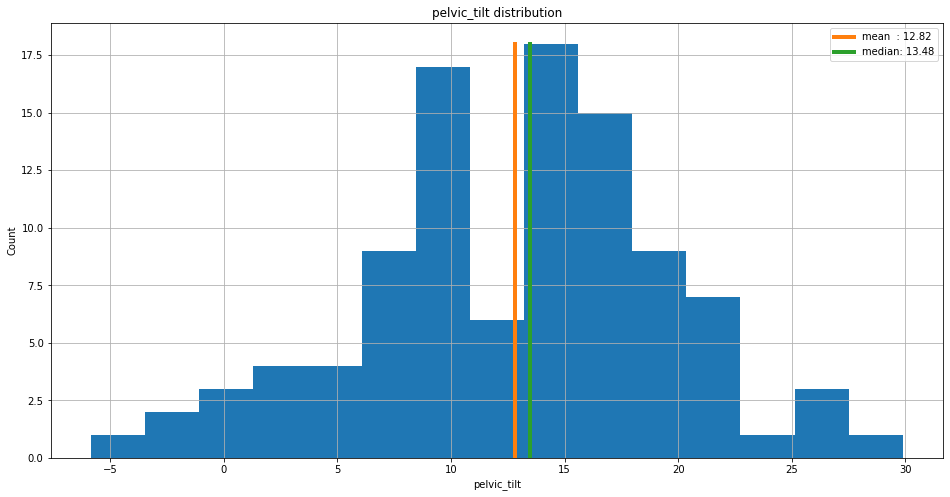

<AxesSubplot:>

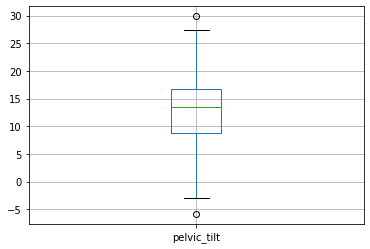

In [51]:
first_look(df_norm['pelvic_tilt'], bins=15)
df_norm.boxplot(column='pelvic_tilt')

In [50]:
df_norm['pelvic_tilt'].describe()

count    100.000000
mean      12.821414
std        6.778503
min       -5.845994
25%        8.799951
50%       13.482435
75%       16.785953
max       29.894119
Name: pelvic_tilt, dtype: float64

> **Гипотеза** Распределение для здоровых предполагает среднее значение около 13. Мода и среднеее значение совпадают.
>

### угол таза (pelvic incidence)

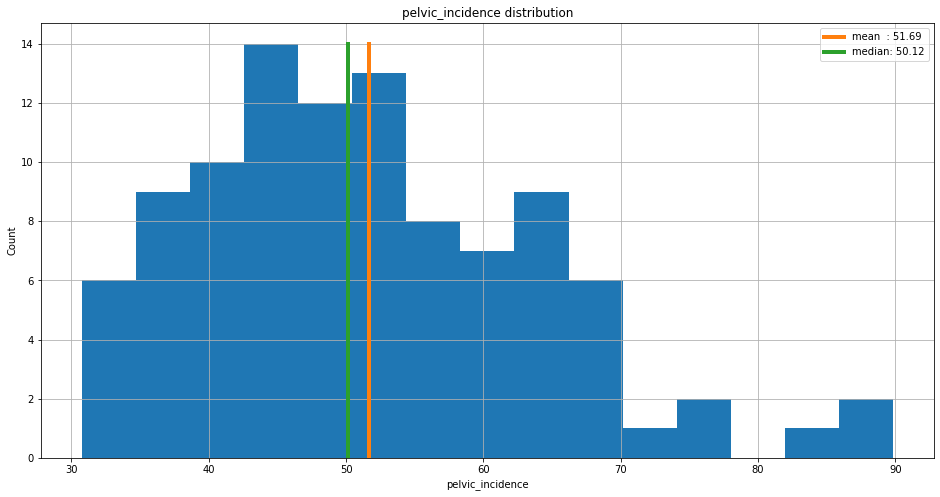

In [34]:
first_look(df_norm['pelvic_incidence'], bins=15)

> **Гипотеза** параметр имеет довольно равномерное распределение. Среднее значение около 50. Мода и среднеее значение совпадают.

### угол поясничного лордоза (lumbar lordosis angle)

In [ ]:
first_look(df_norm['lumbar_lordosis_angle'], bins=20)

> **Гипотеза** параметр имеет довольно равномерное распределение. Среднее значение около 43. Мода и среднеее значение совпадают.

### крестцовый склон (sacral slope)

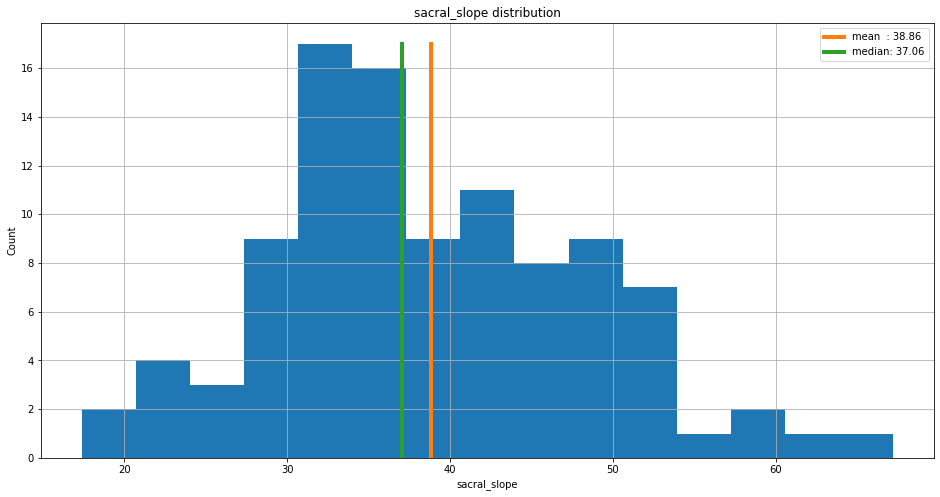

In [31]:
first_look(df_norm['sacral_slope'], bins=15)

> **Гипотеза** Среднее значение около 38. Мода и среднеее значение совпадают.

### радиус таза (pelvic radius)

In [ ]:
first_look(df_norm['pelvic_radius'], bins=15)

> **Гипотеза** Среднее значение около 123. Мода и среднеее значение совпадают.

### степень спондилолистеза (grade of spondylolisthesis)

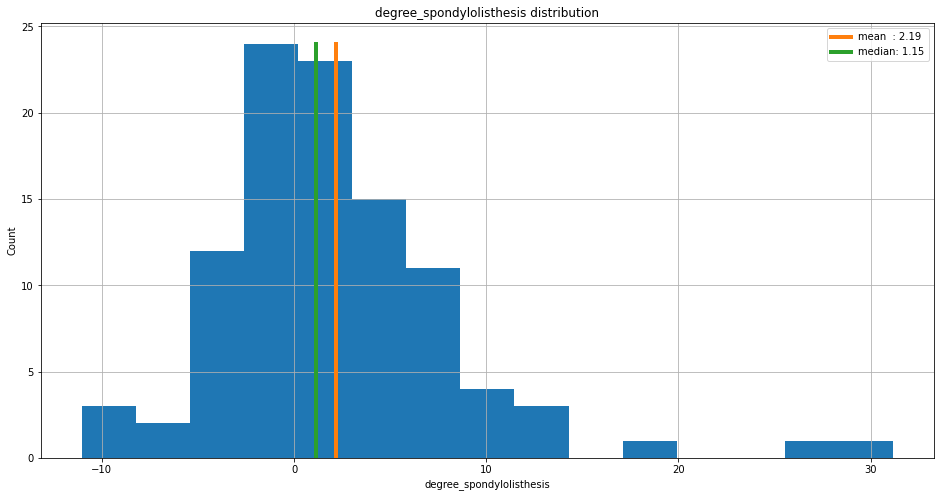

In [32]:
first_look(df_norm['degree_spondylolisthesis'], bins=15)

> **Гипотеза** Среднее значение около 2.2. Мода и среднеее значение практически совпадают.